In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats

import utils
import seaborn as sns 
import seaborn.objects as so
import plotnine as pn
from sklearn.preprocessing import StandardScaler, scale
import matplotlib.pyplot as plt
from matplotlib import style 




# 3-dot

In [5]:
fn = utils.path_data / 'ana_action_plan_dimentionality/three_dot_dim.csv'
df = pd.read_csv(fn)
df['accuracy'] = df['accuracy']=='correct'
df['dim'] = 1-df['dim']
df = df.rename(columns={'auc_pred_accuracy_target': 'Predicted accuracy'})
df = df.rename(columns={'accuracy': 'Ground true accuracy'})
df = df.rename(columns={'actual control': 'Degree of control'})
df = df.rename(columns={'angular bias': 'Rotation'})
df = df.rename(columns={'dim': 'Dimensionality'})
df = df.rename(columns={'group': 'Group'})
df['Group'] = df['Group'].replace({'H': 'Health', 'S': 'Patient'})
df['Rotation'] = df['Rotation'].astype(str)
xtick = df['Degree of control'].unique()
df.head()

,participant,trial no.,target dot,Degree of control,Rotation,selected dot,Ground true accuracy,Group,Dimensionality
0,K-Reg-H-10,1,2,0.30,0,1,False,Health,0.589187
1,K-Reg-H-10,2,2,0.55,0,1,False,Health,0.679092
2,K-Reg-H-10,3,3,0.30,90,1,False,Health,0.510871
3,K-Reg-H-10,4,3,0.55,0,3,True,Health,0.614895
4,K-Reg-H-10,5,3,0.30,90,3,True,Health,0.640262


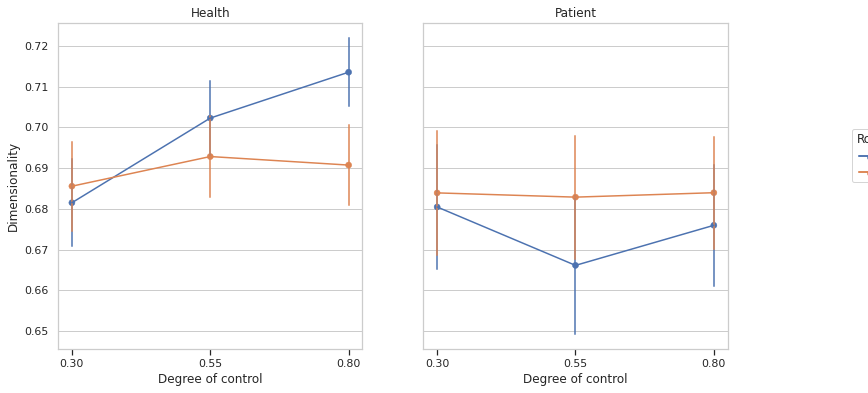

In [108]:
df_ = df.copy()
df_ = df_.drop(["trial no.", "selected dot", "target dot"], axis=1)
df_ = df_.groupby(['participant', 'Group', 'Rotation', 'Degree of control']).mean().reset_index()
df_.head()


fig = plt.figure(figsize=(12,6))
plot = (
    so.Plot(df_, x='Degree of control',  y='Dimensionality', color='Rotation')
    .theme(sns.axes_style("whitegrid"))
    .layout(size=(12, 6))
    .facet("Group")
    .theme(sns.axes_style({'xtick.bottom': True}))
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge(gap=-1, by="Rotation"))
    .add(so.Line(), so.Agg())
    .add(so.Dot(), so.Agg())
    .scale(x=so.Continuous().tick(at=xtick))
    # remove vertial grid
    # .limit(y=(-0.05, 1.05))
    .on(fig)
    # change size
)
# remove xtics
plot.plot()
fig.axes[0].grid(False, axis='x')
fig.axes[1].grid(False, axis='x')


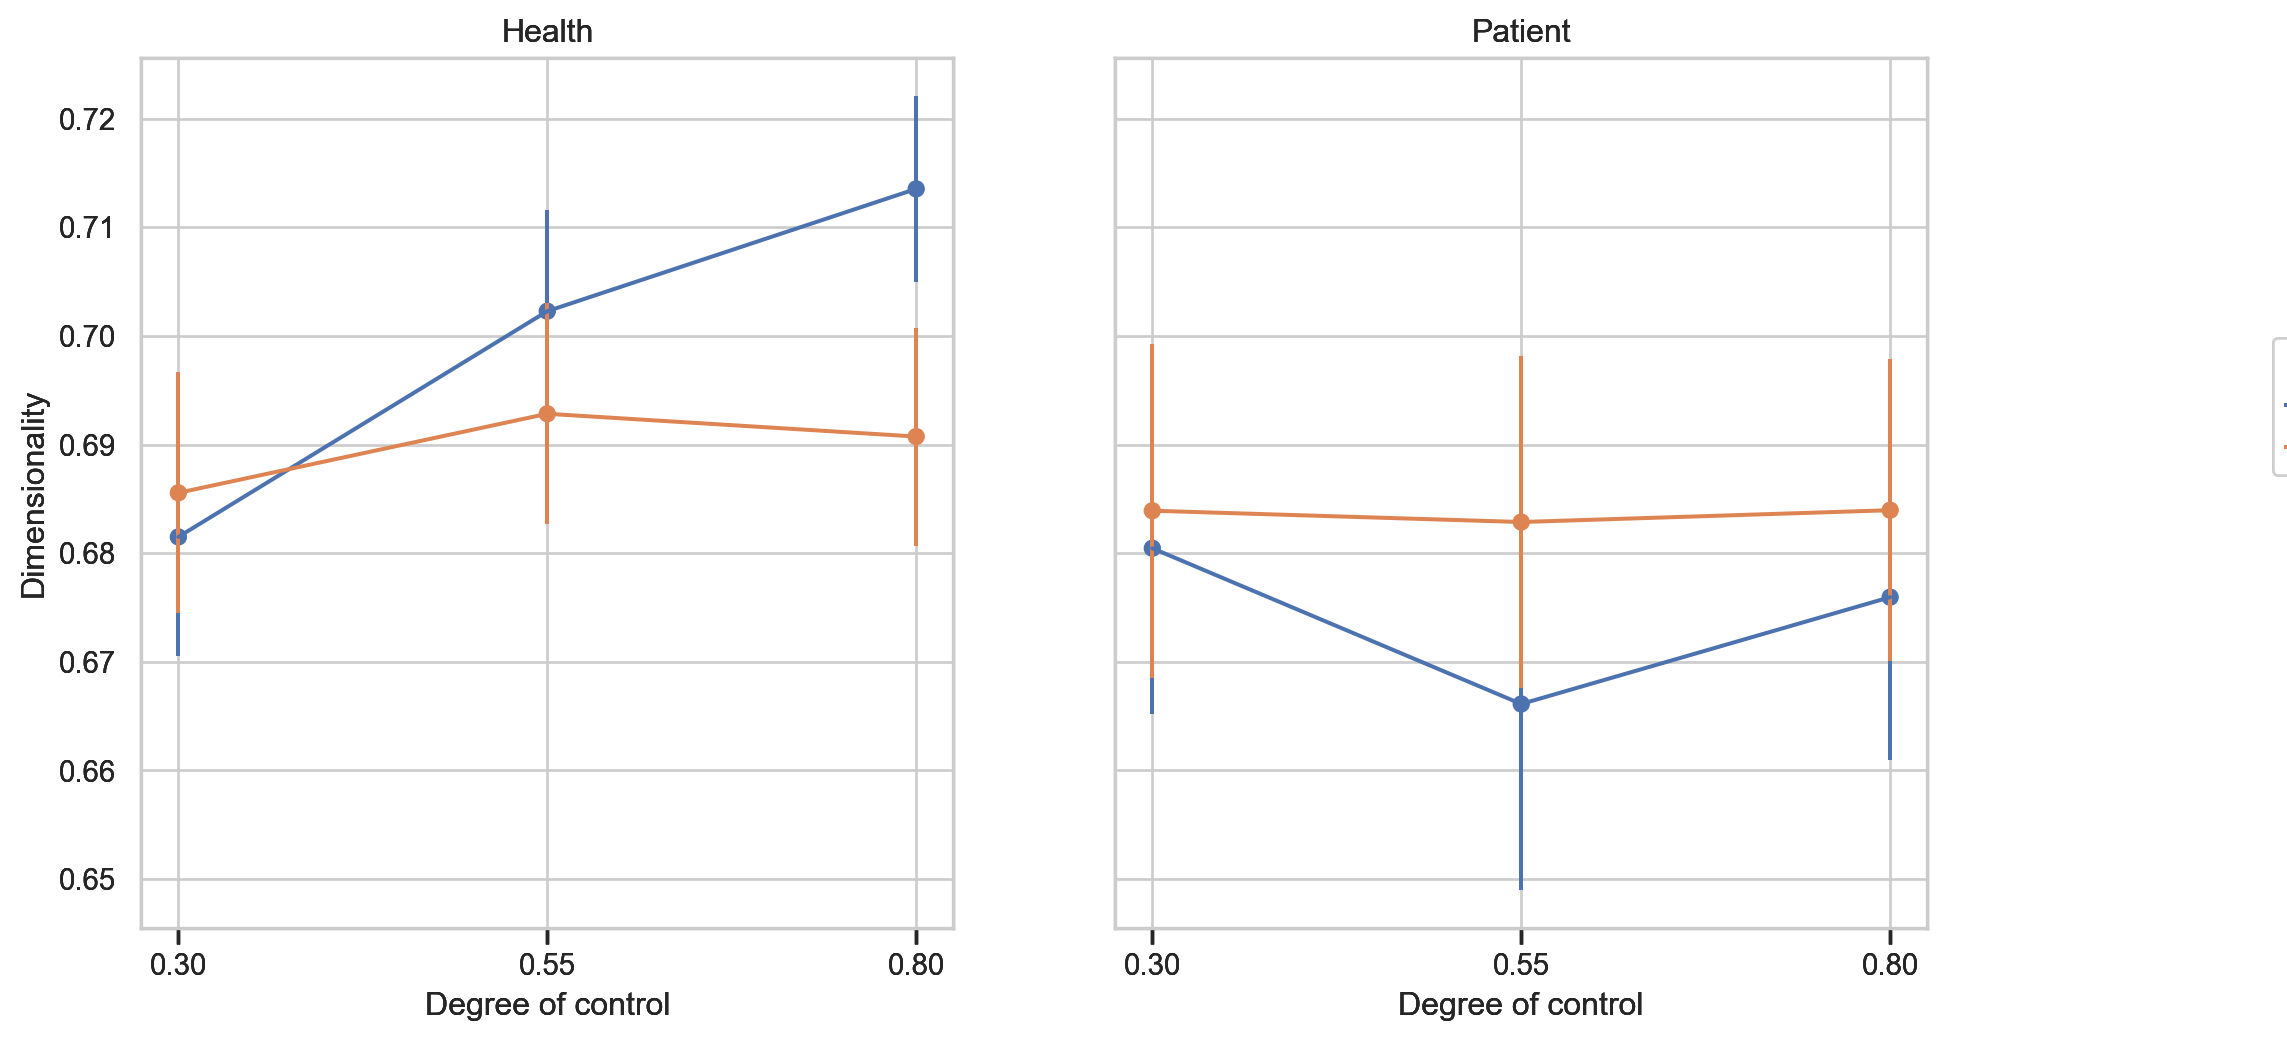

In [109]:
fn = utils.Save.savepath('ms_dim', '3d.pdf')
plot.save(fn)

# 1-dot

In [113]:
df.columns

Index(['participant', 'trial no.', 'actual control', 'angular bias',
       'response', 'group', 'dim'],
      dtype='object')

In [115]:
fn = utils.path_data / 'ana_action_plan_dimentionality/one_dot_dim.csv'
df = pd.read_csv(fn)
# df['accuracy'] = df['accuracy']=='correct'
df['dim'] = 1-df['dim']
# df = df.rename(columns={'auc_pred_accuracy_target': 'Predicted accuracy'})
# df = df.rename(columns={'accuracy': 'Ground true accuracy'})
df = df.rename(columns={'actual control': 'Degree of control'})
df = df.rename(columns={'angular bias': 'Rotation'})
df = df.rename(columns={'dim': 'Dimensionality'})
df = df.rename(columns={'group': 'Group'})
df['Group'] = df['Group'].replace({'H': 'Health', 'S': 'Patient'})
df['Rotation'] = df['Rotation'].astype(str)
xtick = df['Degree of control'].unique()
df.head()

,participant,trial no.,Degree of control,Rotation,response,Group,Dimensionality
0,K-Reg-H-10,1,0.30,0,0,Health,0.735311
1,K-Reg-H-10,2,0.80,0,1,Health,0.804284
2,K-Reg-H-10,3,0.30,0,0,Health,0.760106
3,K-Reg-H-10,4,0.55,90,0,Health,0.762449
4,K-Reg-H-10,5,0.30,90,0,Health,0.750095


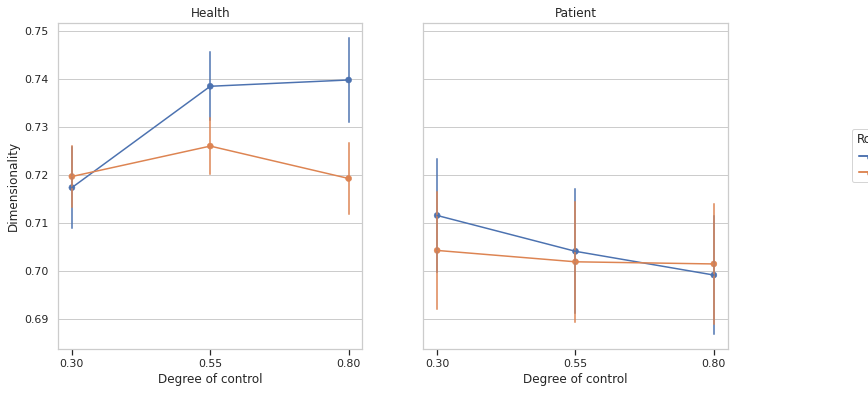

In [118]:
df_ = df.copy()
df_ = df_.drop(["trial no.", 'response'], axis=1)
df_ = df_.groupby(['participant', 'Group', 'Rotation', 'Degree of control']).mean().reset_index()
df_.head()


fig = plt.figure(figsize=(12,6))
plot = (
    so.Plot(df_, x='Degree of control',  y='Dimensionality', color='Rotation')
    .theme(sns.axes_style("whitegrid"))
    .layout(size=(12, 6))
    .facet("Group")
    .theme(sns.axes_style({'xtick.bottom': True}))
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge(gap=-1, by="Rotation"))
    .add(so.Line(), so.Agg())
    .add(so.Dot(), so.Agg())
    .scale(x=so.Continuous().tick(at=xtick))
    # remove vertial grid
    # .limit(y=(-0.05, 1.05))
    .on(fig)
    # change size
)
# remove xtics
plot.plot()
fig.axes[0].grid(False, axis='x')
fig.axes[1].grid(False, axis='x')


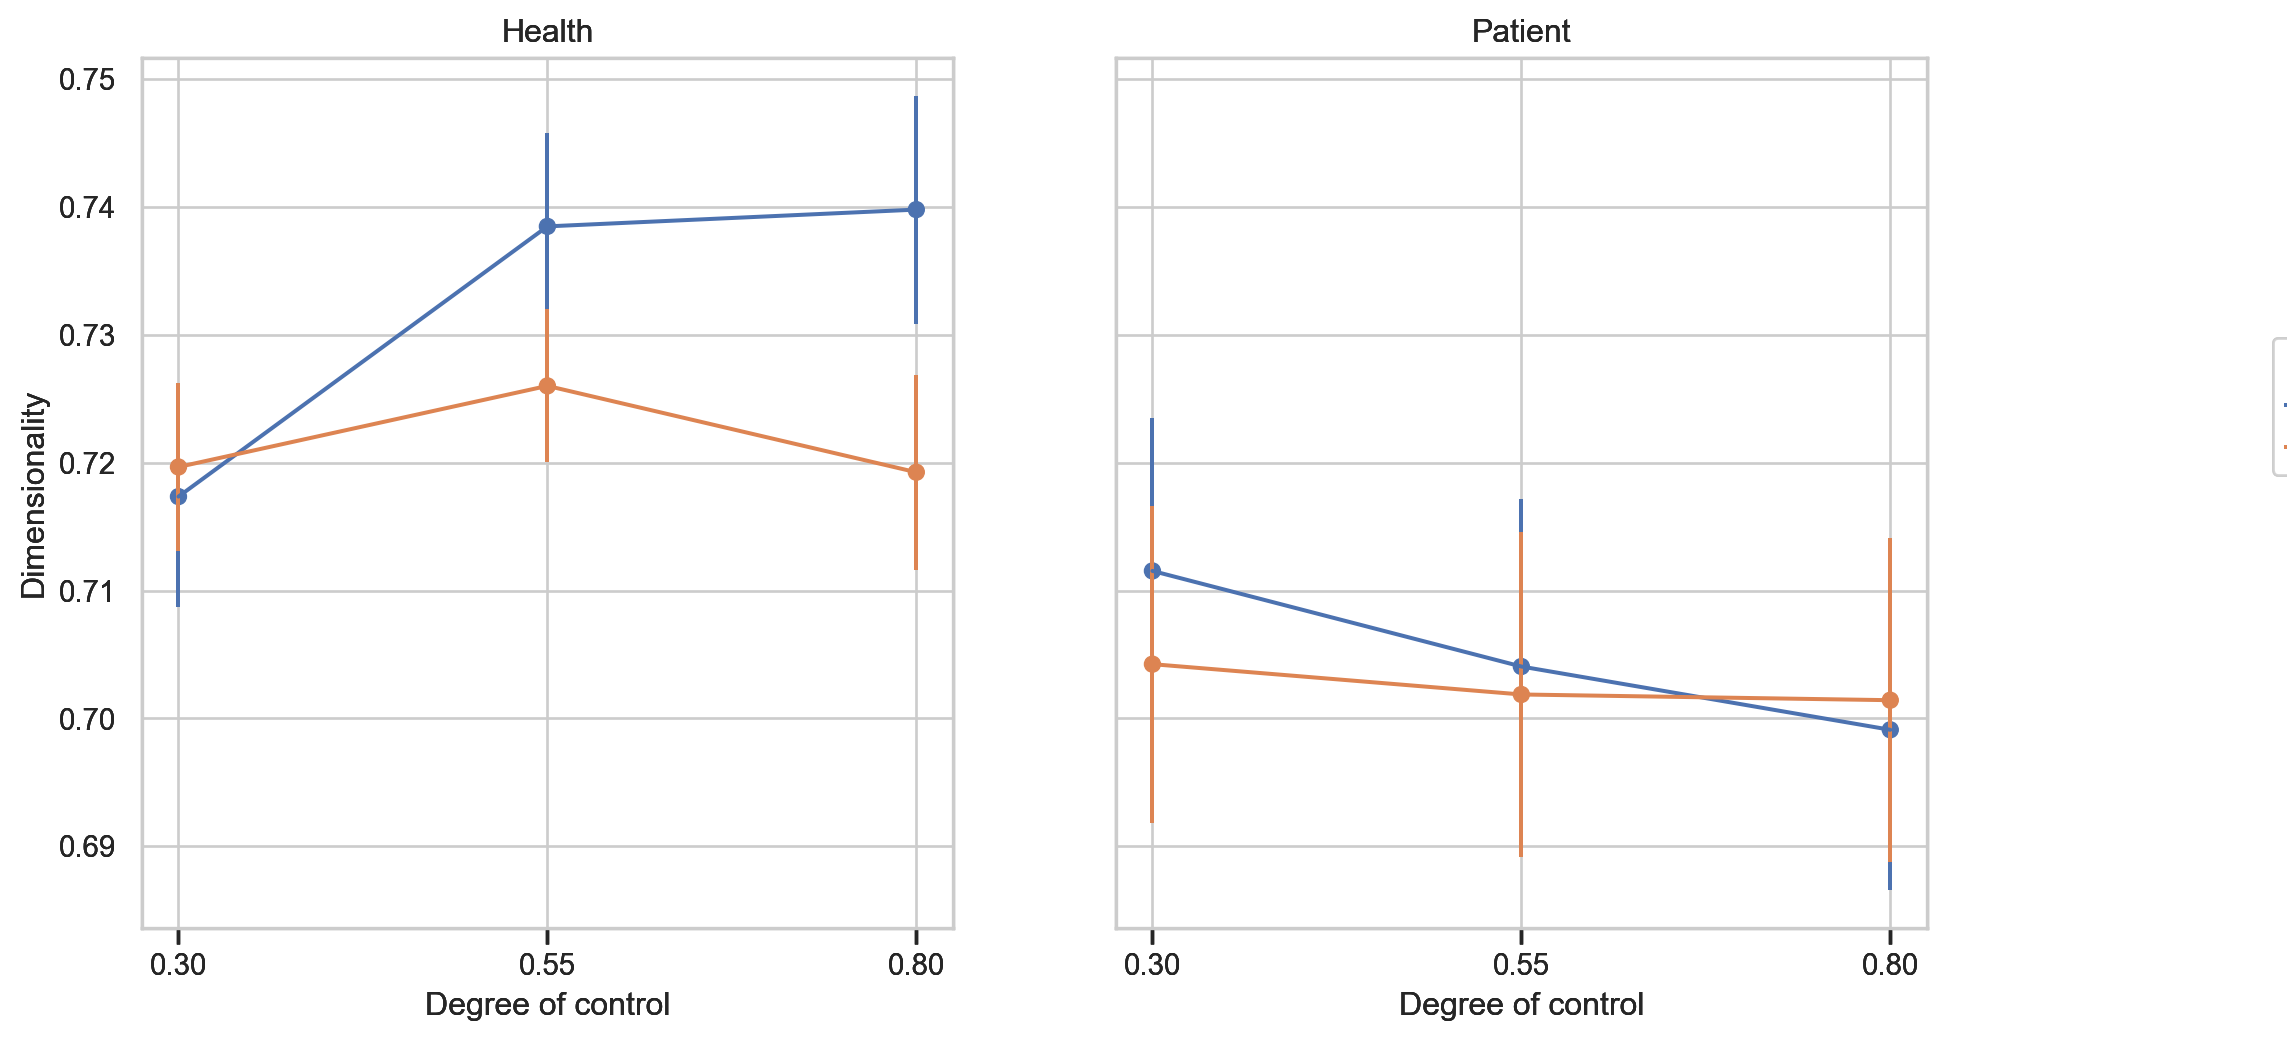

In [119]:
fn = utils.Save.savepath('ms_dim', '1d.pdf')
plot.save(fn)

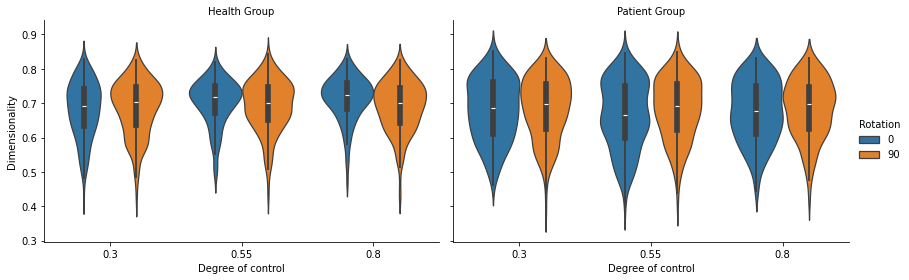

In [93]:
g = sns.catplot(
    data=df, x="Degree of control", y="Dimensionality", col="Group", hue="Rotation",
    kind="violin", height=4, aspect=1.5,
)
# g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(xtick)
g.set_titles("{col_name} {col_var}")
# g.set(ylim=(0, 1))
# g.despine(left=True)

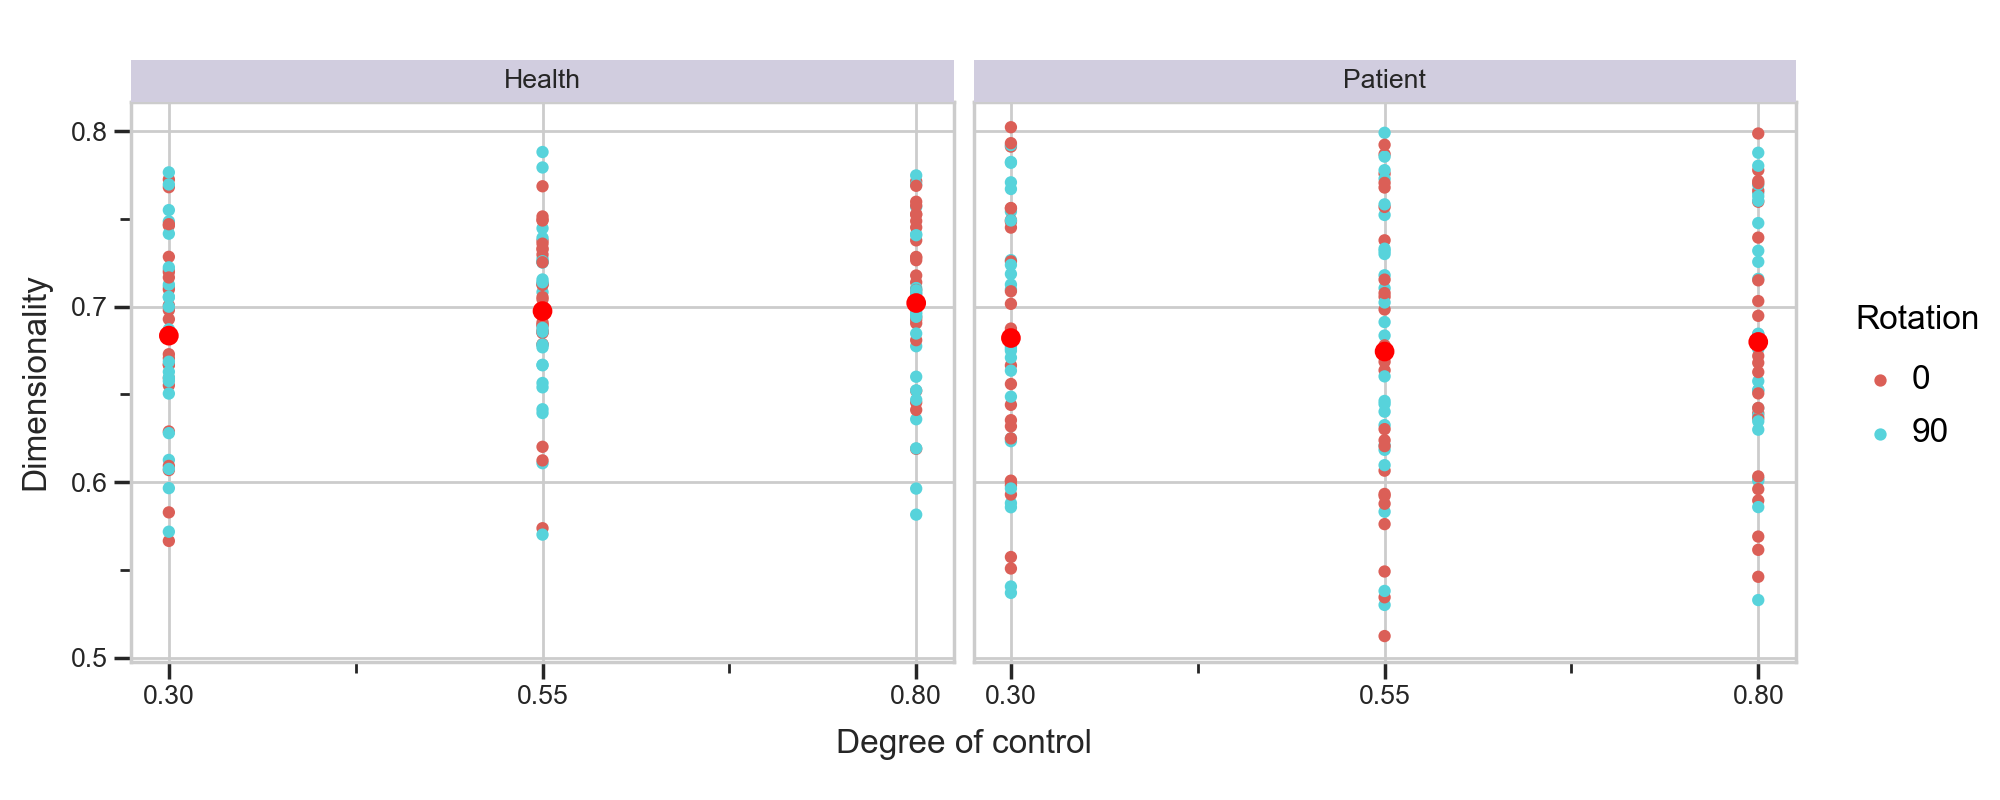

<Figure Size: (1000 x 400)>

In [119]:
from plotnine import *
plot = (
    ggplot(df_, aes(x='Degree of control', y='Dimensionality', color='Rotation'))
    + theme_seaborn('whitegrid')
    + geom_point(stat=stat_)
    # + geom_line()
    + facet_wrap('Group')
    + theme()
    + theme(figure_size=(10, 4))
    + scale_x_continuous(breaks=xtick)
    + stat_summary(fun_y=np.mean, geom="point", color="red", size=3)

)
plot




In [59]:
df_ = df[df['group']=='S']
# select specific columns
df_ = df_[['participant', 'accuracy', 'dim']]
df_ = df_.groupby(['participant']).mean().reset_index()

# correlation between accuracy and dim
corr = scipy.stats.pearsonr(df_['accuracy'], df_['dim'])
print('correlation between accuracy and dim: ', corr)

correlation between accuracy and dim:  PearsonRResult(statistic=-0.1830633491010417, pvalue=0.3810890386744031)


t-test:  2.9895080535302325 0.006362294621213252


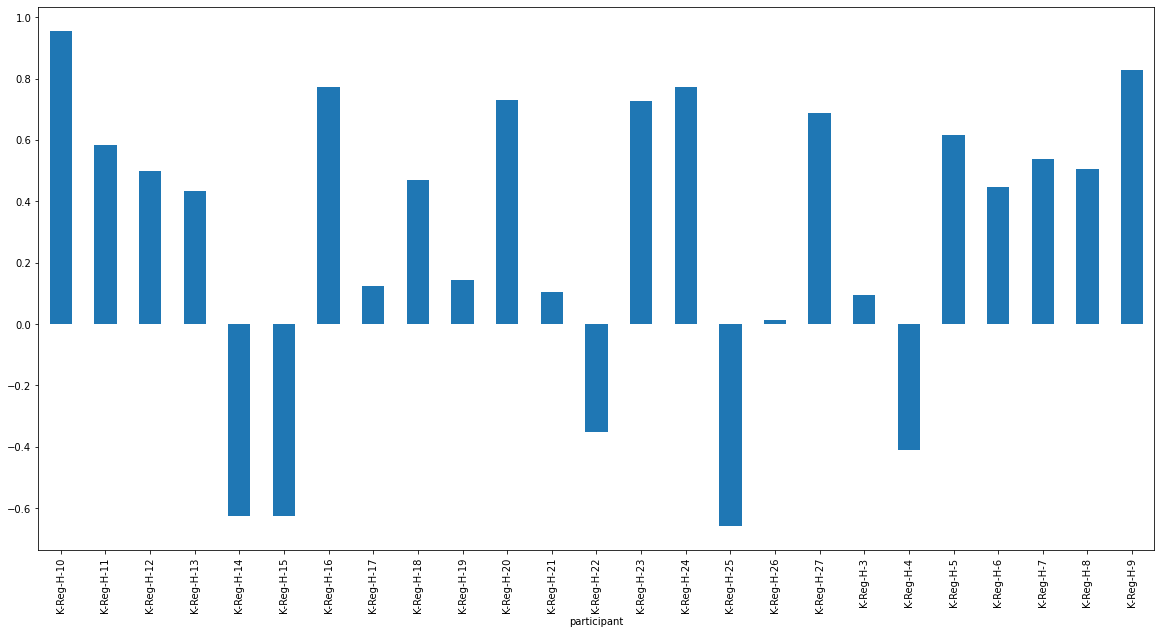

In [48]:
# compute correlation and reurn r
def compute_correlation(x, y):
    r, p = scipy.stats.pearsonr(x, y)
    return r

df_ = df[df["group"] == "H"]
# select specific columns
# df_ = df_[['participant', 'accuracy', 'dim']]
df_ = df_.drop(["trial no.", "selected dot", "target dot", 'group'], axis=1)
df_ = df_.groupby(["participant", "actual control", "angular bias"]).mean().reset_index()

# compute correlation and name the column as r
df_corr = df_.groupby(["participant"])
df_corr = df_corr.apply(lambda x: compute_correlation(x["accuracy"], x["dim"]))
df_corr = df_corr.reset_index()
df_corr = df_corr.rename(columns={0: "r"})
df_corr.head()

# plot correlation
df_corr.plot.bar(x="participant", y='r', figsize=(20, 10), legend=False)

# t-test if the correlation is significant
t, p = scipy.stats.ttest_1samp(df_corr["r"], 0)
print("t-test: ", t, p)


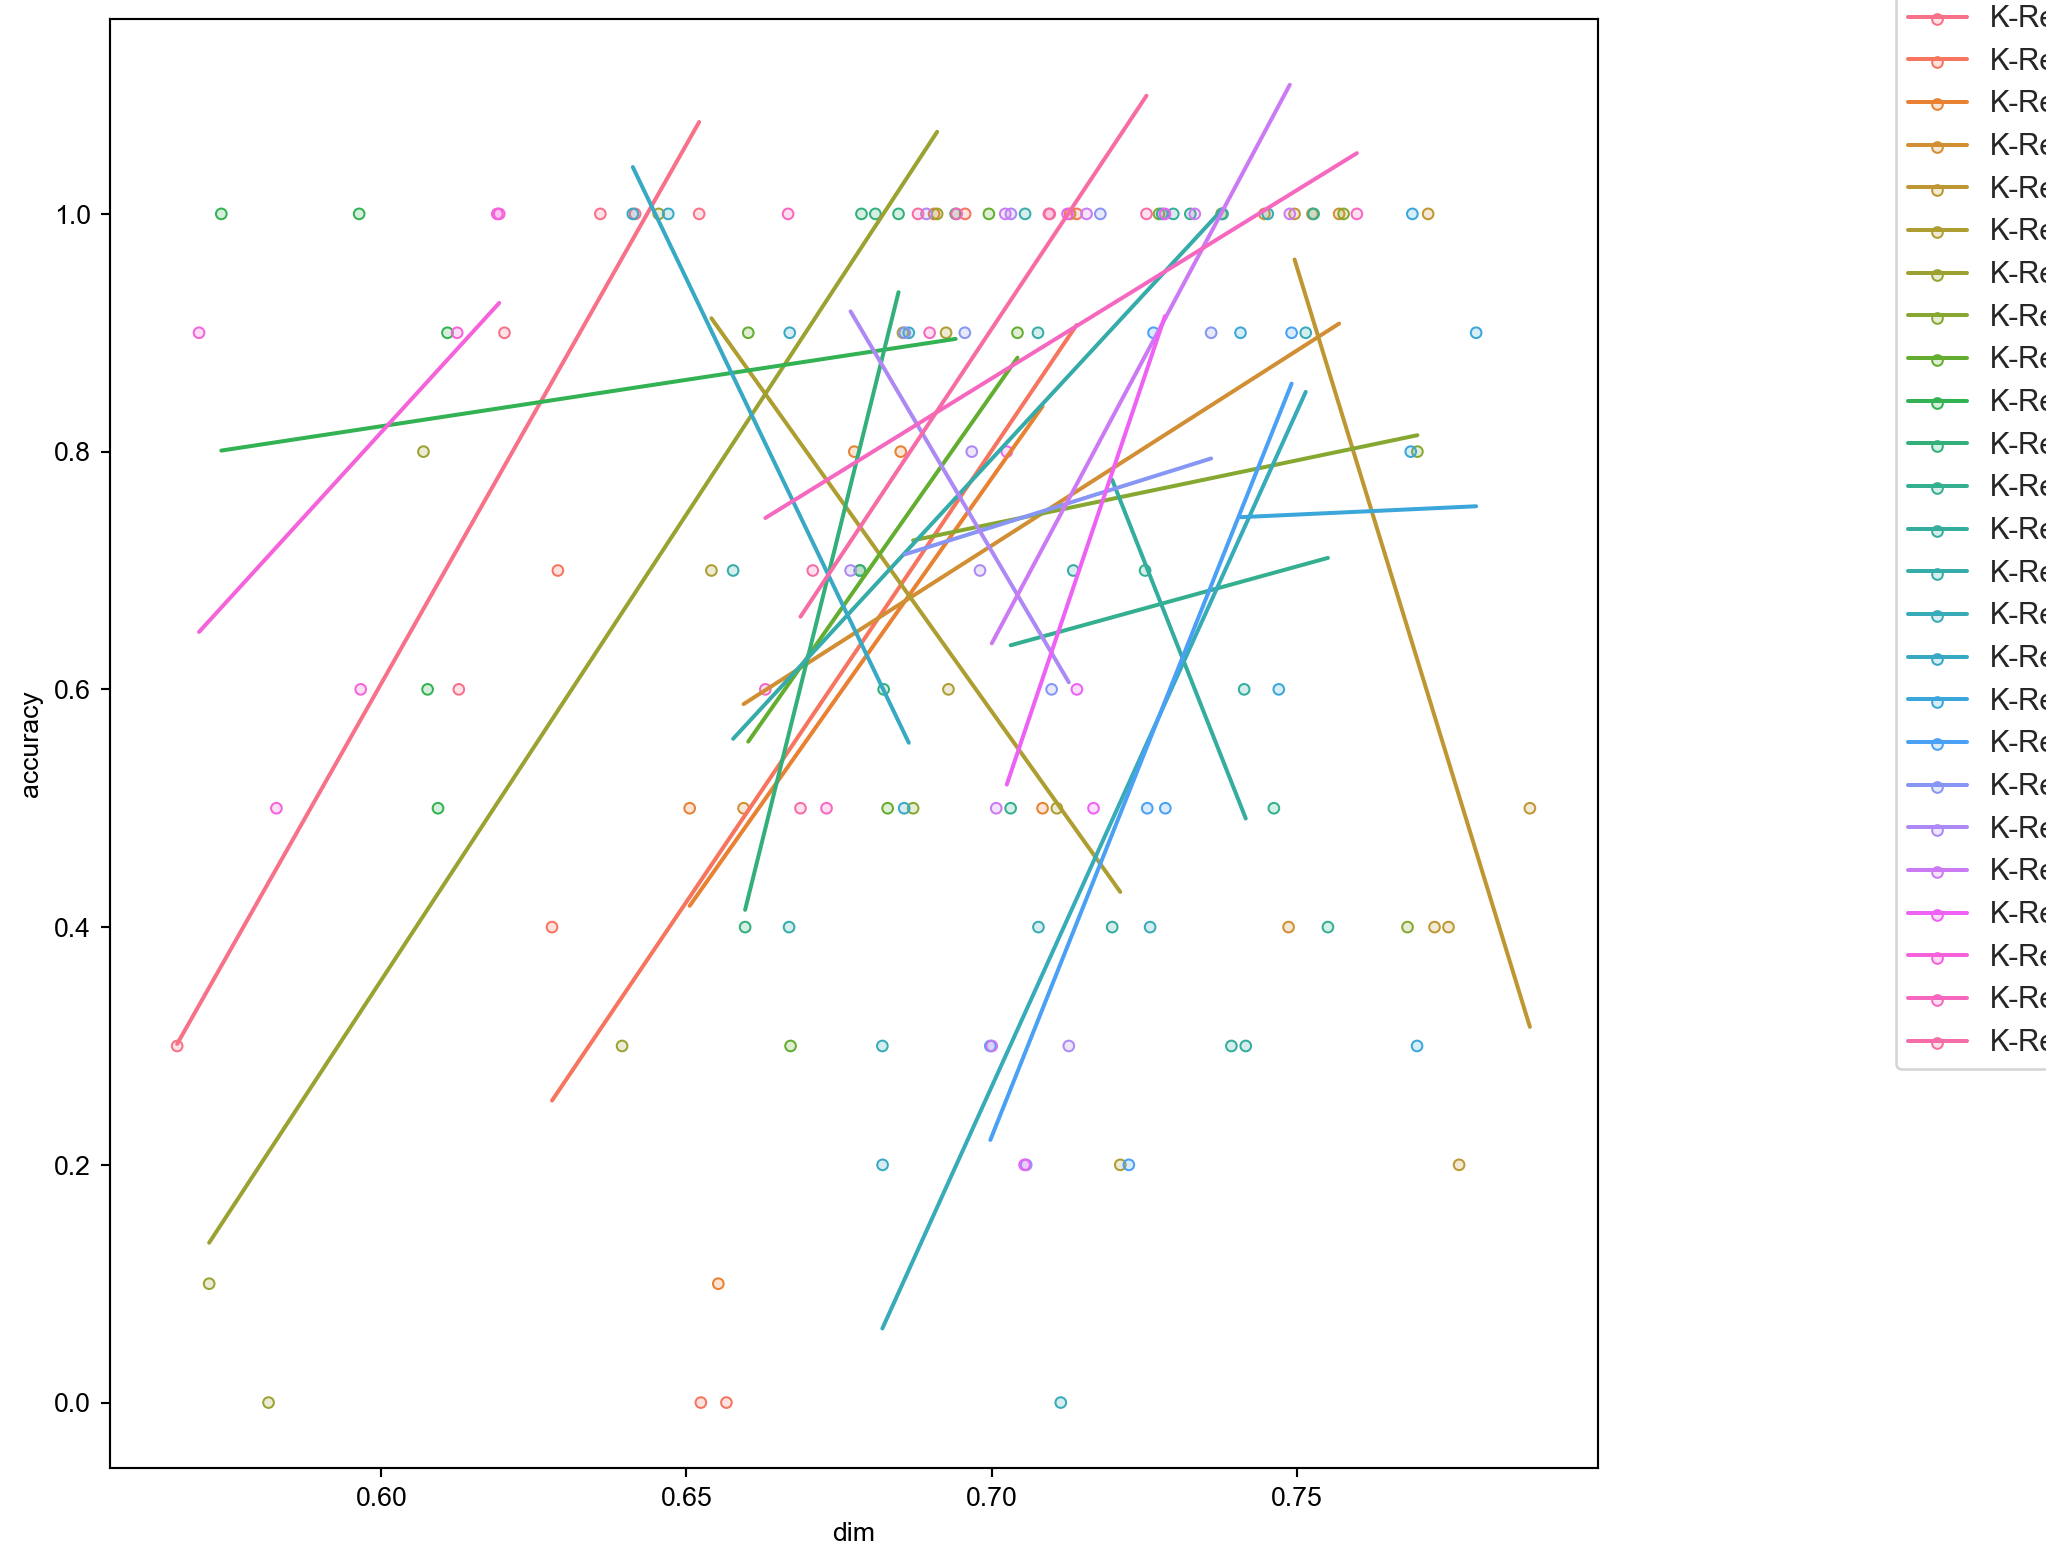

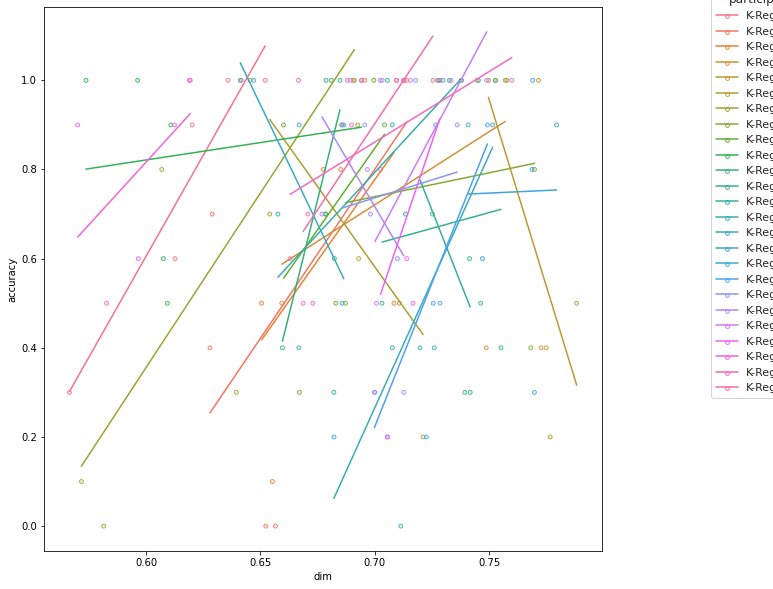

In [58]:
df_all = df_.drop(["actual control", "angular bias"], axis=1)
df_all.head()

fig, ax = plt.subplots(figsize=(10, 10))
plot = (
    so.Plot(df_all, x='dim', y='accuracy', color='participant')
    .theme(sns.axes_style("whitegrid"))
    # add regression line
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(order=1))
    .on(ax)
    # .show()
)
plot.plot()


t-test:  -0.9074362019556464 0.37319793386317246


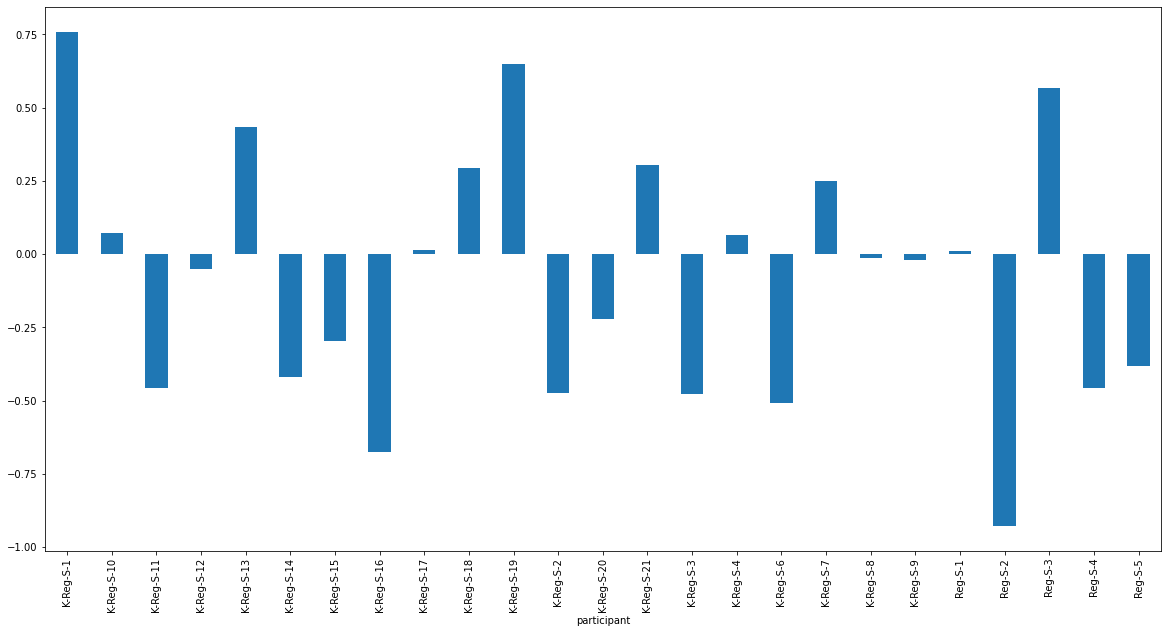

In [43]:
# compute correlation and reurn r
def compute_correlation(x, y):
    r, p = scipy.stats.pearsonr(x, y)
    return r

df_ = df[df["group"] == "S"]
# select specific columns
# df_ = df_[['participant', 'accuracy', 'dim']]
df_ = df_.drop(["trial no.", "selected dot", "target dot", 'group'], axis=1)
df_ = df_.groupby(["participant", "actual control", "angular bias"]).mean().reset_index()

# compute correlation and name the column as r
df_ = df_.groupby(["participant"])
df_ = df_.apply(lambda x: compute_correlation(x["accuracy"], x["dim"]))
df_ = df_.reset_index()
df_ = df_.rename(columns={0: "r"})
df_.head()

# plot correlation
df_.plot.bar(x="participant", y='r', figsize=(20, 10), legend=False)

# t-test if the correlation is significant
t, p = scipy.stats.ttest_1samp(df_["r"], 0)
print("t-test: ", t, p)


In [ ]:
df['dim'] = 1-df['dim']
df = df.drop(['trial no.', 'accuracy', 'selected dot', 'target dot'], axis=1)
df = df.groupby(['group', 'participant', 'actual control', 'angular bias'])
df = df.mean().reset_index()

df = df.rename(columns={'actual control': 'actual_control', 'angular bias': 'angular_bias'})


df['actual_control'] = df['actual_control'].astype('category')
df['angular_bias'] = df['angular_bias'].astype('category')